In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import collections
import sys, os, re
import predict_severity
import numpy as np
import skimage
import severity_utils
import pickle
import torch, torchvision
import torch.nn.functional as F

In [3]:
sys.path.insert(0,"../torchxrayvision")
import torchxrayvision as xrv

In [4]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

In [5]:
# https://doi.org/10.5281/zenodo.4633999
dataset = xrv.datasets.StonyBrookCOVID_Dataset(imgpath="CXR_images_scored/",
                                               csvpath="ralo-dataset-metadata.csv",
                                               transform=transform)

In [6]:
results = []
def kw(**kwargs):
    return kwargs

common_args = kw(seed=1, plot=True,method="skip")


In [7]:
model = predict_severity.PneumoniaSeverityNetStonyBrook().cuda()
res = []
for sample in dataset:
    img = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()
    ret = model(img)
    
    res.append({"geographic_extent":float(ret["geographic_extent"].detach().cpu().numpy()),
                "opacity":float(ret["opacity"].detach().cpu().numpy())})

skip - no training, just running evaluation


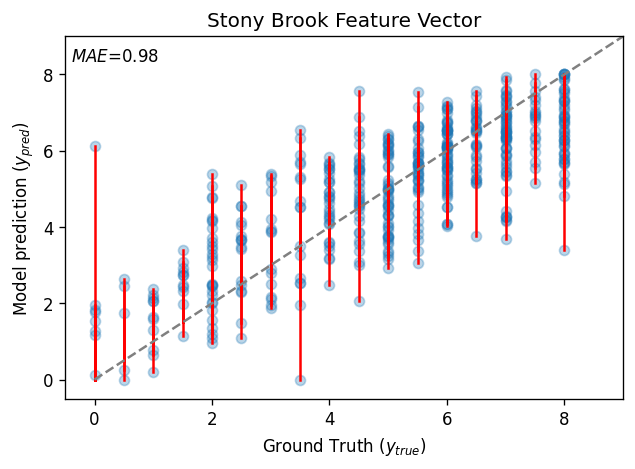

0.98±0.79


In [8]:
# 1 output+LR
labels = dataset.csv["Geographic Extent"]
data = pd.DataFrame(res)["geographic_extent"]
a = severity_utils.evaluate(data, labels, label_name="Geographic Extent",title="Stony Brook Feature Vector", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


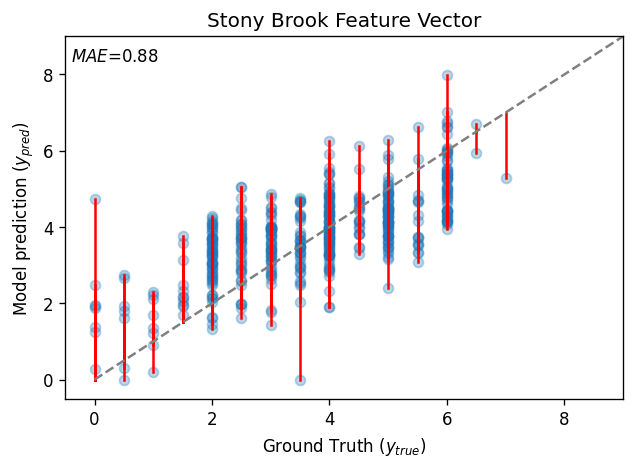

0.88±0.64


In [9]:
# 1 output+LR
labels = dataset.csv["Lung Opacity"]
data = pd.DataFrame(res)["opacity"]
a = severity_utils.evaluate(data, labels, label_name="Lung Opacity",title="Stony Brook Feature Vector",**common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

In [10]:
model = predict_severity.PneumoniaSeverityNetCIDC().cuda()
res = []
for sample in dataset:
    img = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()
    ret = model(img)
    
    res.append({"geographic_extent":float(ret["geographic_extent"].detach().cpu().numpy()),
                "opacity":float(ret["opacity"].detach().cpu().numpy())})

skip - no training, just running evaluation


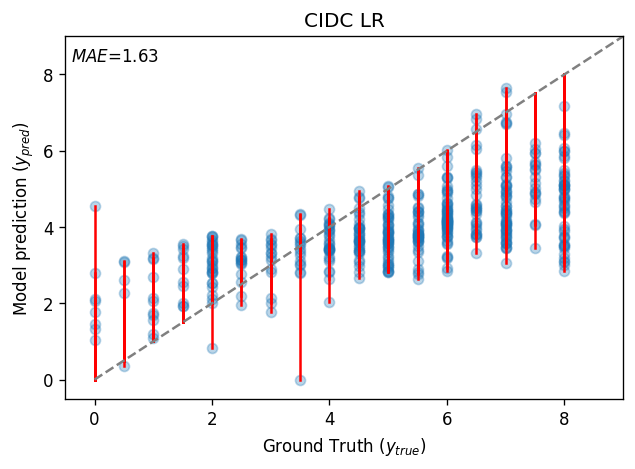

1.63±1.09


In [11]:
# 1 output+LR
labels = dataset.csv["Geographic Extent"]
data = pd.DataFrame(res)["geographic_extent"]
a = severity_utils.evaluate(data, labels, label_name="Geographic Extent",title="CIDC LR", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


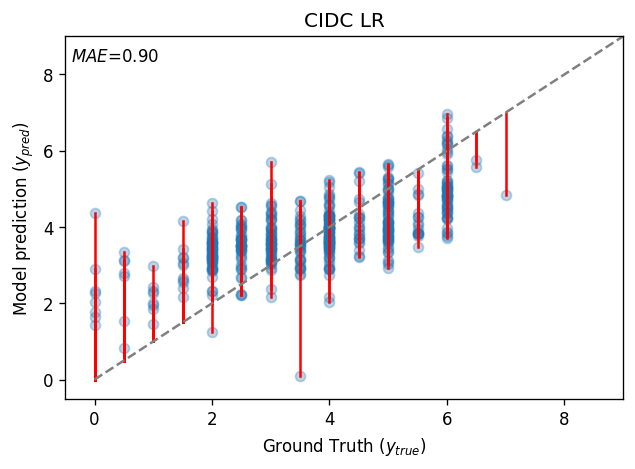

0.90±0.64


In [12]:
# 1 output+LR
labels = dataset.csv["Lung Opacity"]
data = pd.DataFrame(res)["opacity"]
a = severity_utils.evaluate(data, labels, label_name="Lung Opacity",title="CIDC LR",**common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


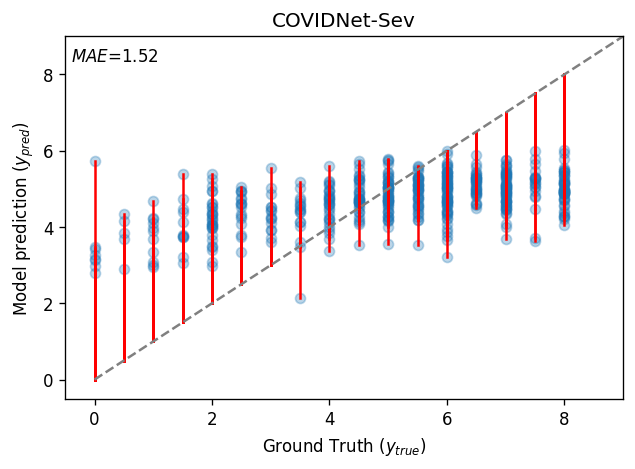

1.52±1.03


In [13]:
labels = dataset.csv["Geographic Extent"]
data = pd.read_csv("data/covid-net-sev.csv")["geographic"]
a = severity_utils.evaluate(data, labels, label_name="Geographic Extent",title="COVIDNet-Sev", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


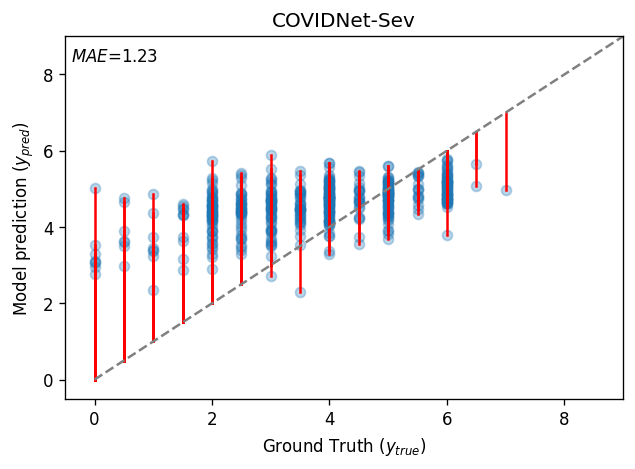

1.23±0.90


In [14]:
labels = dataset.csv["Lung Opacity"]
data = pd.read_csv("data/covid-net-sev.csv")["opacity"]
a = severity_utils.evaluate(data, labels, label_name="Lung Opacity",title="COVIDNet-Sev", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


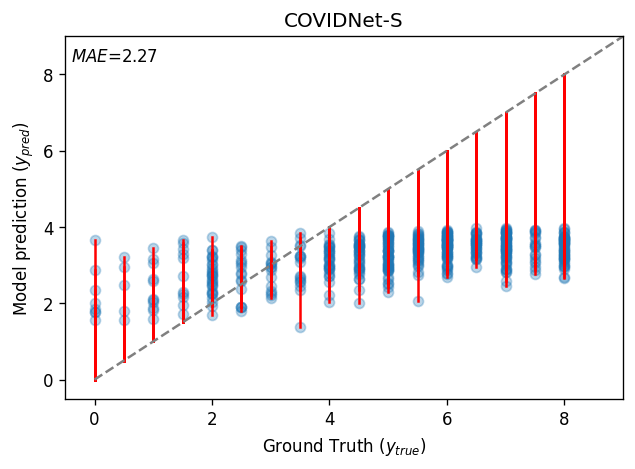

2.27±1.33


In [15]:
labels = dataset.csv["Geographic Extent"]
data = pd.read_csv("data/covidnet-s.csv")["geographic"]
a = severity_utils.evaluate(data, labels, label_name="Geographic Extent",title="COVIDNet-S", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


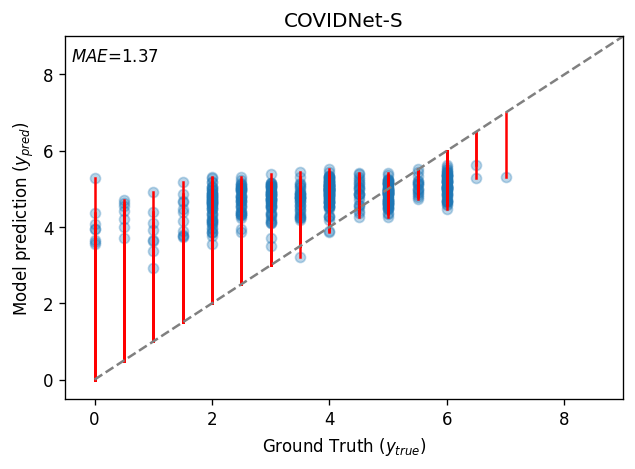

1.37±0.98


In [16]:
labels = dataset.csv["Lung Opacity"]
data = pd.read_csv("data/covidnet-s.csv")["opacity"]
a = severity_utils.evaluate(data, labels, label_name="Lung Opacity",title="COVIDNet-S", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


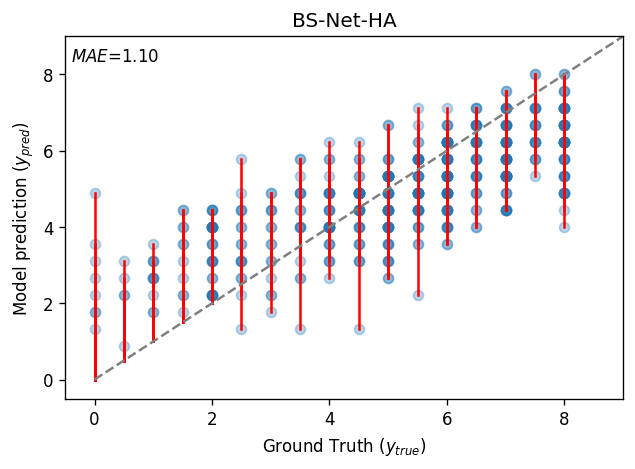

1.10±0.82


In [17]:
labels = dataset.csv["Geographic Extent"]
data = (pd.read_csv("data/bsnet-singlemodel.csv")["brixia"]/18)*8
a = severity_utils.evaluate(data, labels, label_name="Geographic Extent",title="BS-Net-HA", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


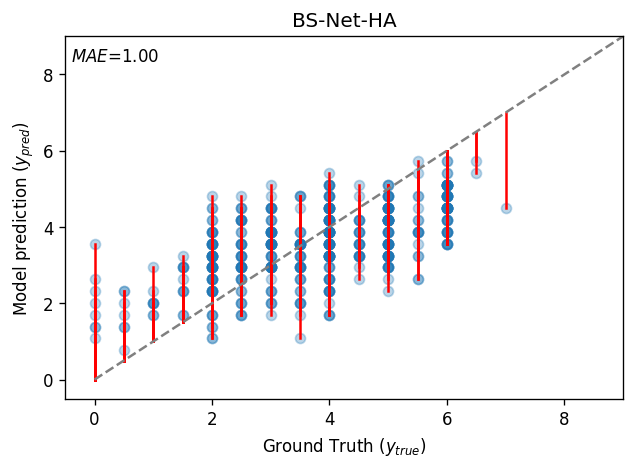

1.00±0.65


In [18]:
labels = dataset.csv["Lung Opacity"]
data = (pd.read_csv("data/bsnet-singlemodel.csv")["brixia"]*0.31)+0.15
a = severity_utils.evaluate(data, labels, label_name="Lung Opacity",title="BS-Net-HA", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


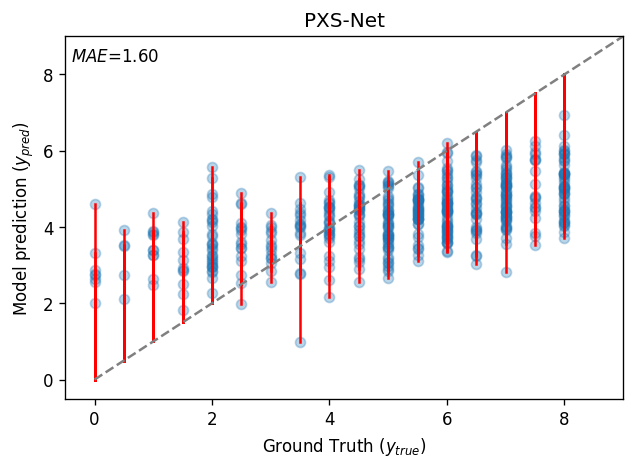

1.60±1.00


In [19]:
labels = dataset.csv["Geographic Extent"]
data = (pd.read_csv("data/pxs-stonybrook.csv")["pxs"]/18)*6
a = severity_utils.evaluate(data, labels, label_name="Geographic Extent",title="PXS-Net", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

skip - no training, just running evaluation


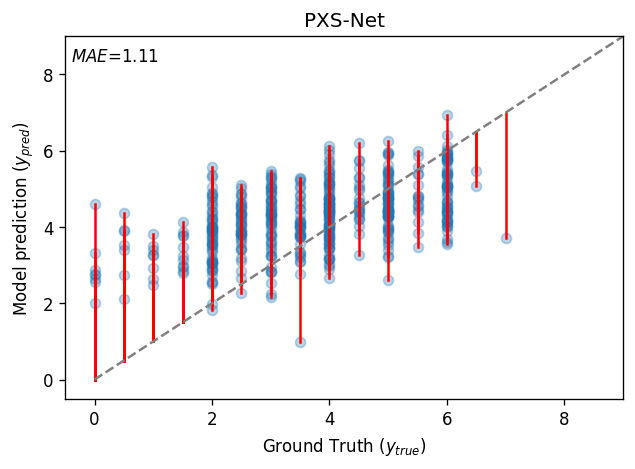

1.11±0.81


In [20]:
labels = dataset.csv["Lung Opacity"]
data = (pd.read_csv("data/pxs-stonybrook.csv")["pxs"]/18)*6
a = severity_utils.evaluate(data, labels, label_name="Lung Opacity",title="PXS-Net", **common_args)
results.append(a)
print("{:1.2f}±{:1.2f}".format(a["MAE"], a["MAE_STDEV"]))

In [21]:
a = pd.DataFrame(results).groupby(["label_name", "method", "name"])[["MAE","MAE_STDEV"]].first().round(2)
#a

In [22]:
pd.DataFrame(a["MAE"].apply("{0:0.2f}".format) + "±" + a["MAE_STDEV"].apply("{0:0.2f}".format))

0
label_name        method name                                 
Geographic Extent skip   BS-Net-HA                   1.10±0.82
                         CIDC LR                     1.63±1.09
                         COVIDNet-S                  2.27±1.33
                         COVIDNet-Sev                1.52±1.03
                         PXS-Net                     1.60±1.00
                         Stony Brook Feature Vector  0.98±0.79
Lung Opacity      skip   BS-Net-HA                   1.00±0.65
                         CIDC LR                     0.90±0.64
                         COVIDNet-S                  1.37±0.98
                         COVIDNet-Sev                1.23±0.90
                         PXS-Net                     1.11±0.81
                         Stony Brook Feature Vector  0.88±0.64